In [2]:
!pip install sentence_transformers

In [3]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)

In [4]:
img_folder = '/kaggle/input/landscape-pictures'

In [6]:
model = SentenceTransformer('clip-ViT-B-32')

In [7]:
img_names = list(glob.glob('/kaggle/input/landscape-pictures/*.jpg'))[:1000]
print("Images:", len(img_names))
img_emb = model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Images: 1000


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [13]:
def search(query, k=1):
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=500,height=500))

Query:


'desert with cactus'

/kaggle/input/landscape-pictures/00000001_(4).jpg


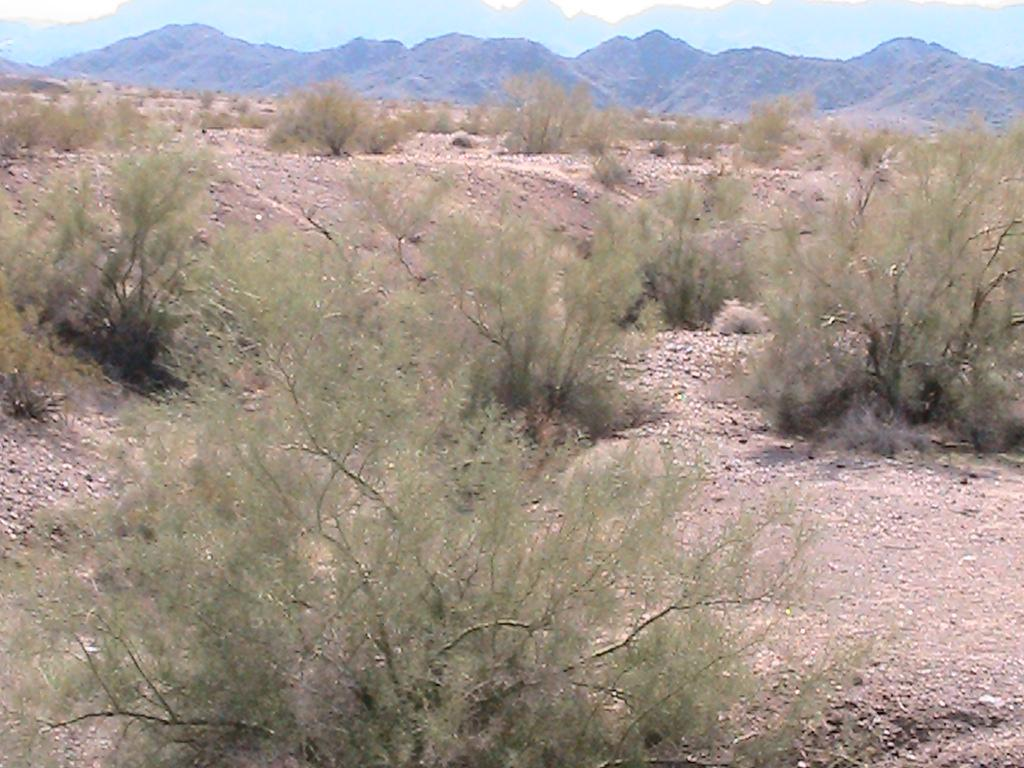

Query:


'a hot desert'

/kaggle/input/landscape-pictures/00000046_(4).jpg


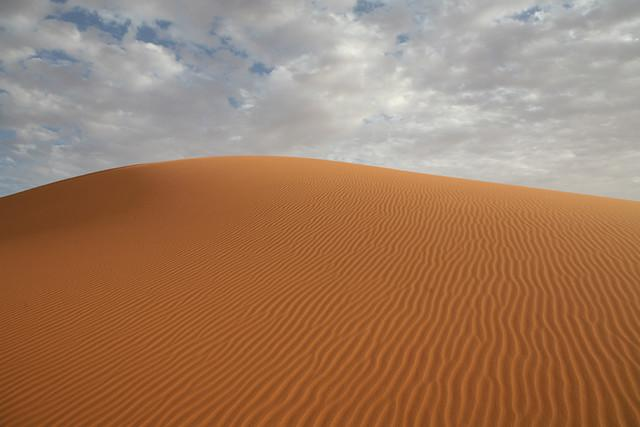

Query:


'mountain range with snow'

/kaggle/input/landscape-pictures/00000638_(3).jpg


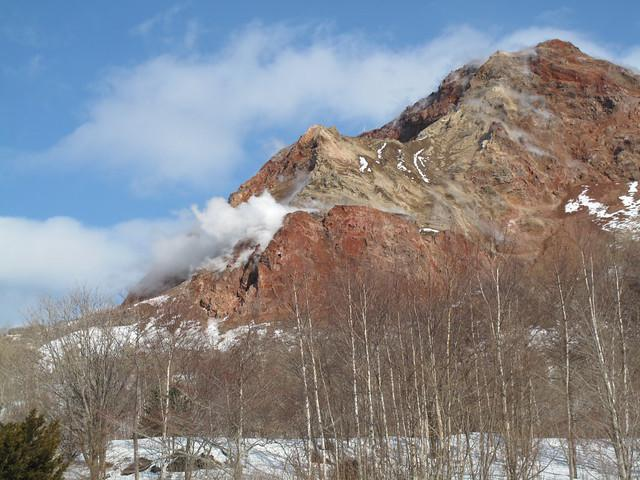

Query:


'mountains with green grass and trees'

/kaggle/input/landscape-pictures/00000019_(3).jpg


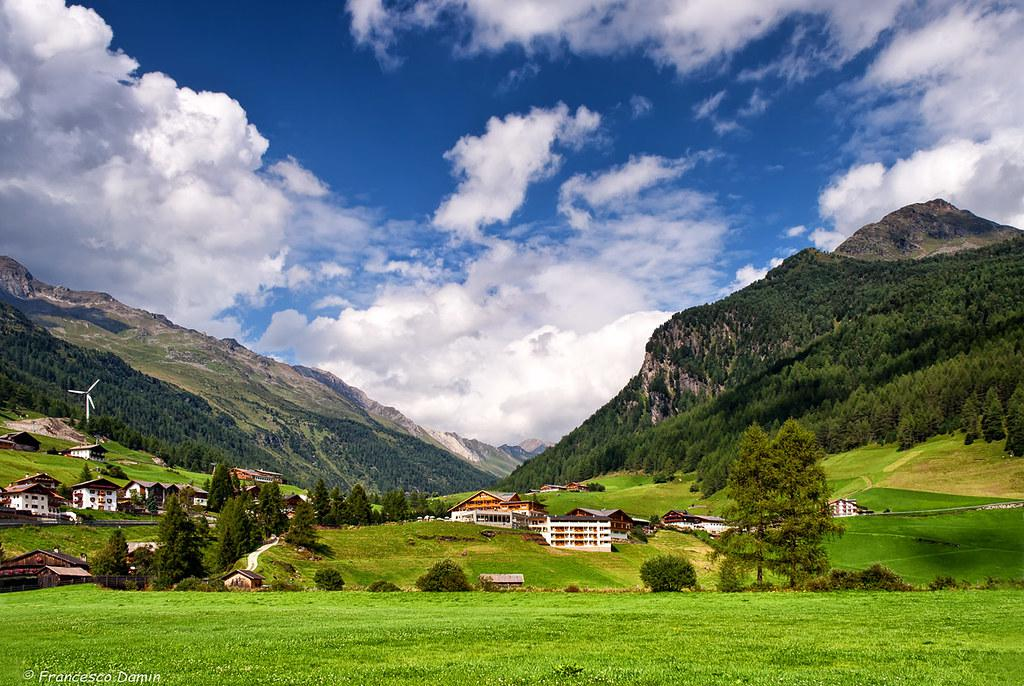

Query:


'beach with palm trees'

/kaggle/input/landscape-pictures/00000334_(4).jpg


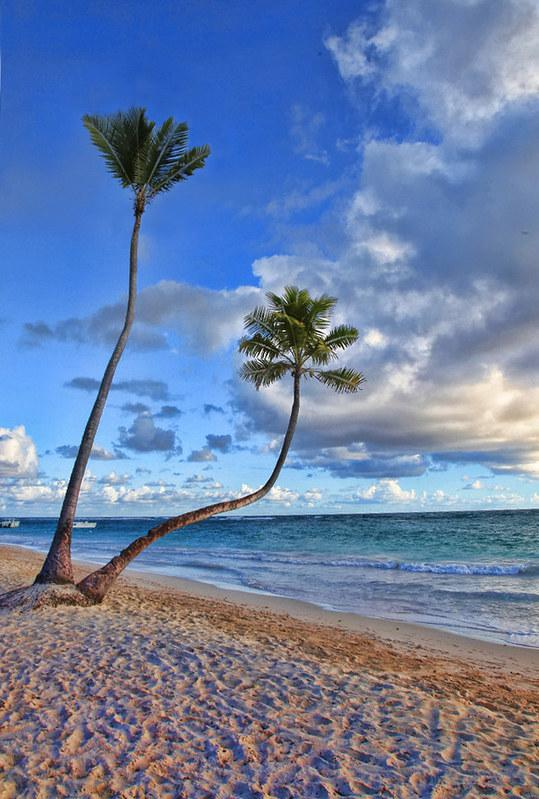

Query:


'tropical island'

/kaggle/input/landscape-pictures/00000172_(4).jpg


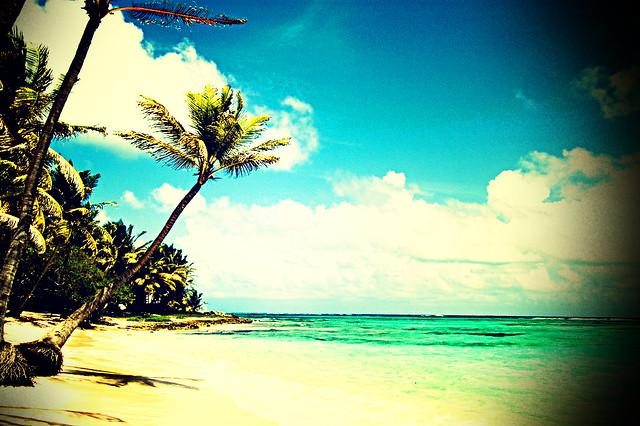

In [20]:
search_list = ['desert with cactus','a hot desert',
               'mountain range with snow','mountains with green grass and trees',
               'beach with palm trees','tropical island']

for i in search_list:
    search(i)